In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config Completer.use_jedi = False

### Part 1: Data and KNN Model

In [2]:
df = pd.read_csv('./data/gene_expression.csv')
df

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


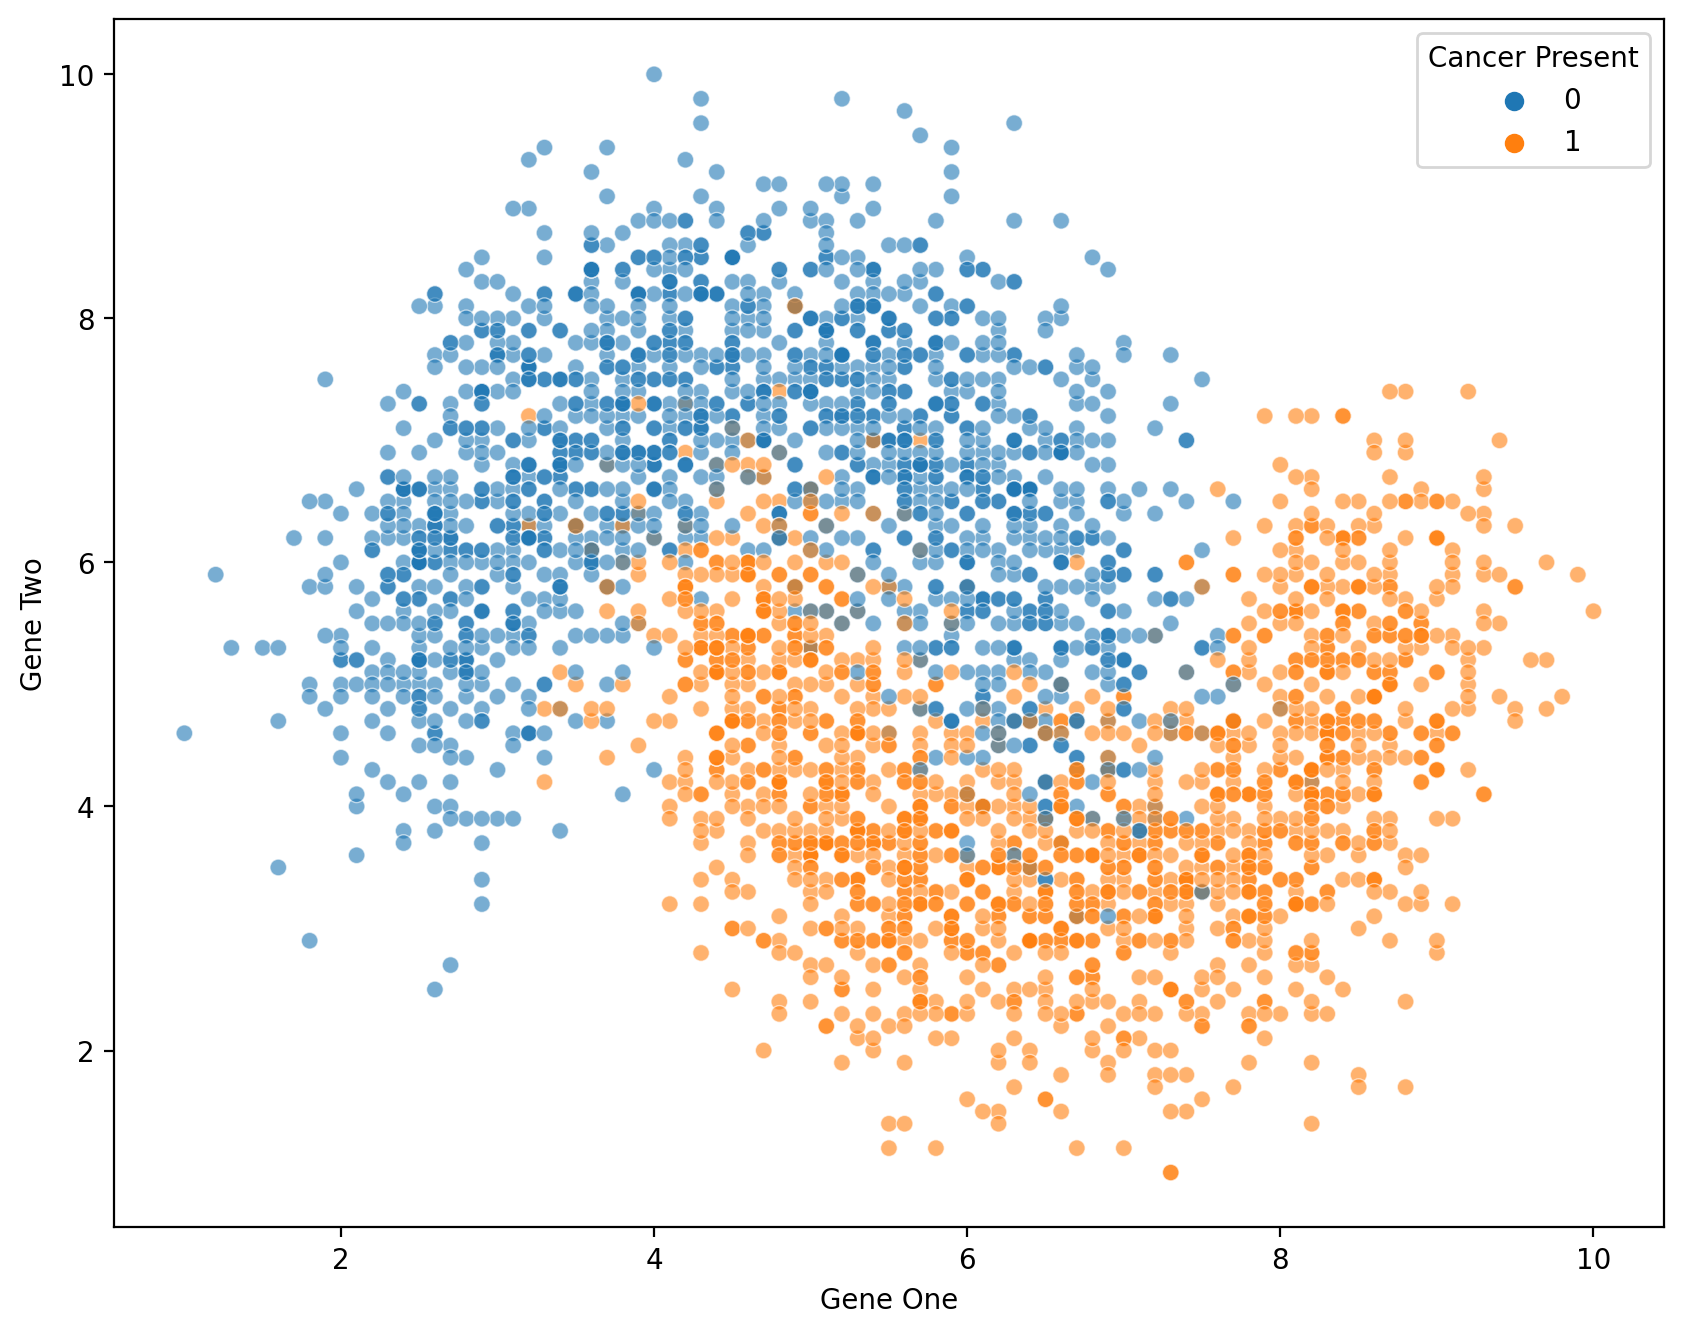

In [3]:
plt.figure(figsize=(10,8), dpi=200)
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present', alpha=0.6);

In [4]:
len(df)

3000

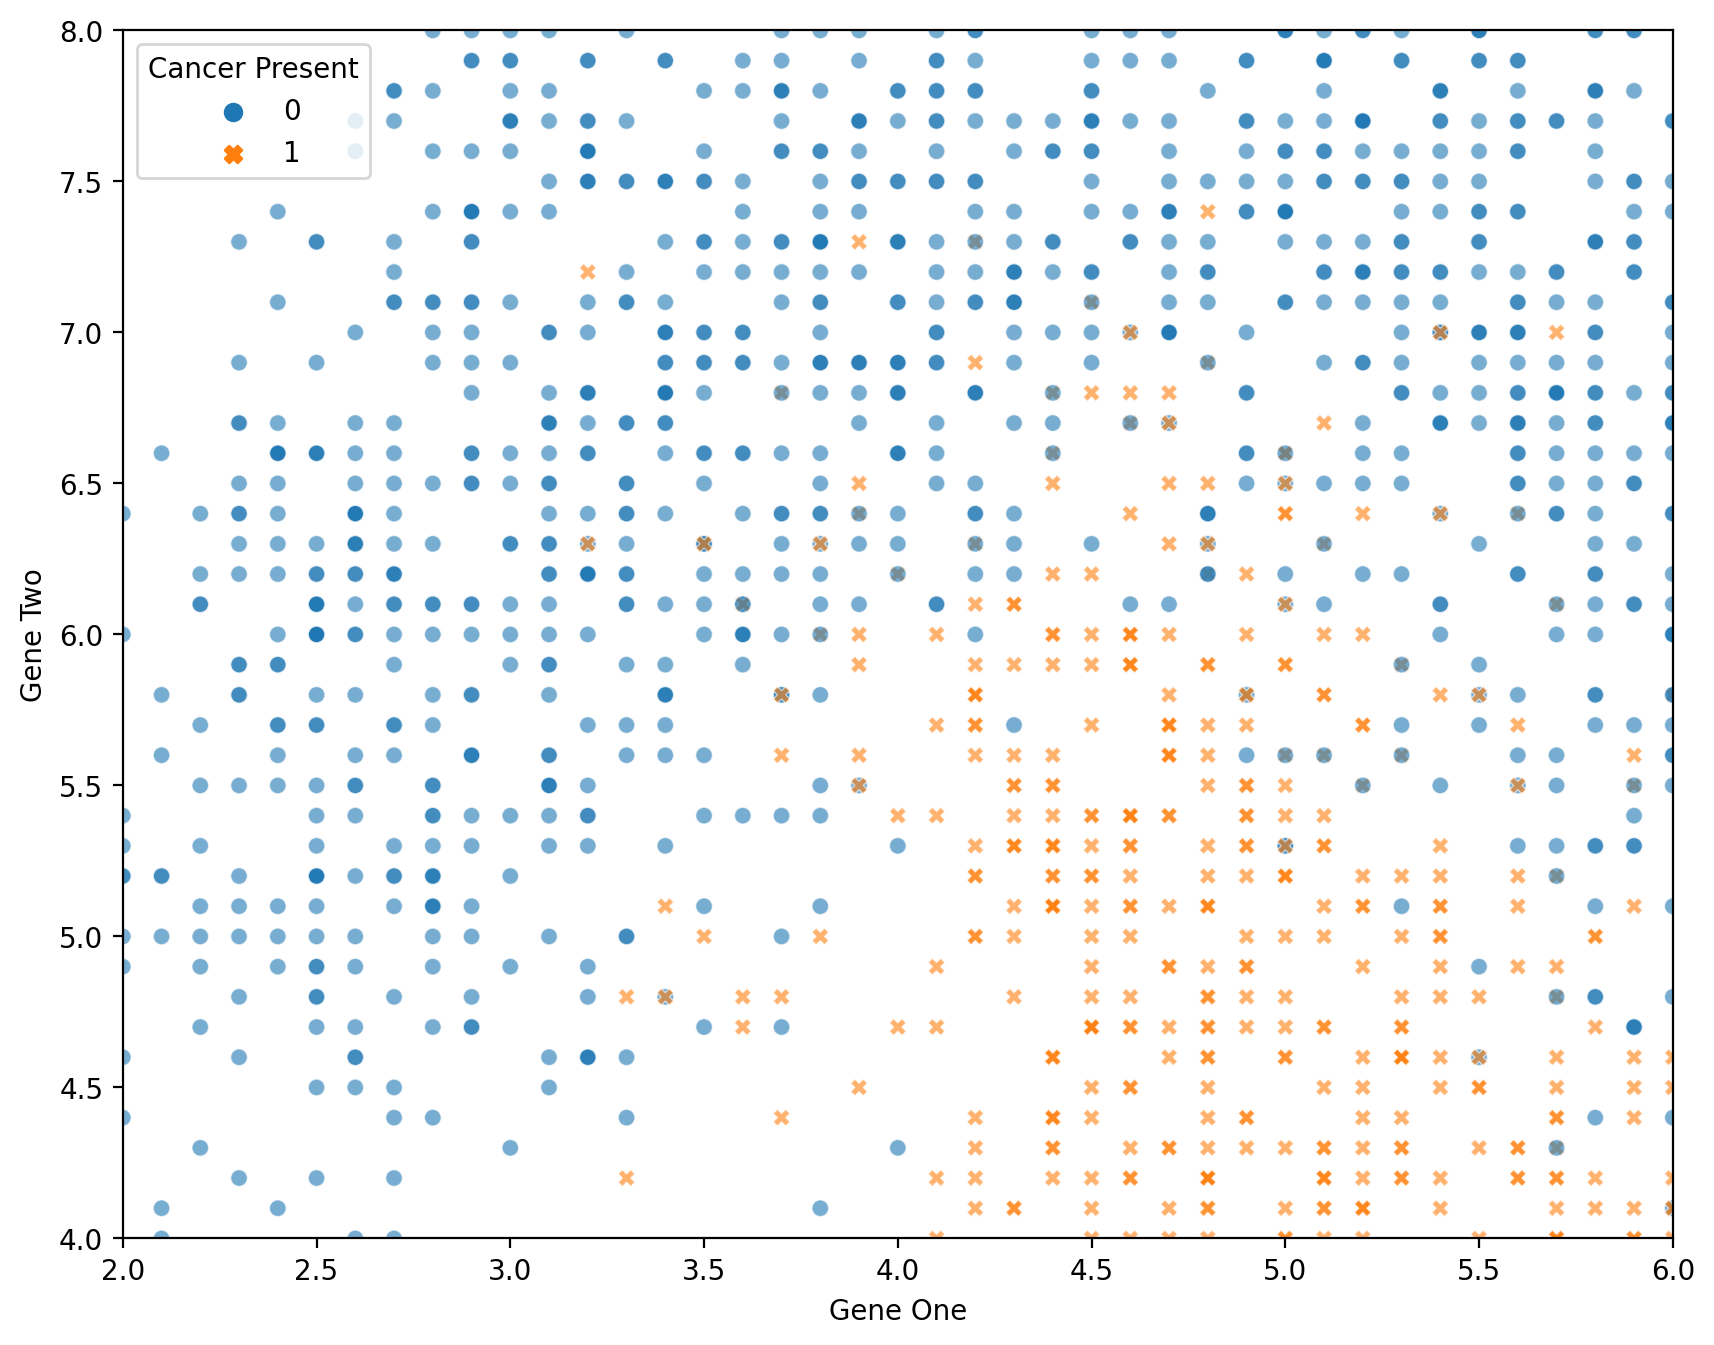

In [5]:
plt.figure(figsize=(10,8), dpi=200)
sns.scatterplot(data=df, x='Gene One', y='Gene Two', 
                hue='Cancer Present', style='Cancer Present', 
                alpha=0.6)

plt.xlim(2,6)
plt.ylim(4,8)

plt.show()

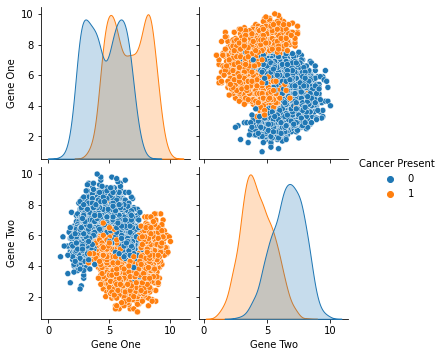

In [6]:
sns.pairplot(data=df, hue='Cancer Present');

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
X = df.drop('Cancer Present', axis=1)
y = df['Cancer Present']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=42)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [11]:
X_test = scaler.transform(X_test)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer ne

In [14]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [15]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
y_pred = knn_model.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix, classification_report

In [18]:
confusion_matrix(y_test, y_pred)

array([[420,  50],
       [ 47, 383]], dtype=int64)

In [19]:
len(y_test)

900

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       470
           1       0.88      0.89      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



In [21]:
df['Cancer Present'].value_counts()

0    1500
1    1500
Name: Cancer Present, dtype: int64

### Part 2: Choosing K for KNN

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
E = 1.0 - accuracy_score(y_test, y_pred)
E

0.10777777777777775

In [24]:
test_error_rates = []
k_max = 31

for K in range(1, k_max):
    knn_model = KNeighborsClassifier(n_neighbors=K)
    knn_model.fit(X_train, y_train)
    
    y_pred = knn_model.predict(X_test)
    
    test_error = 1.0 - accuracy_score(y_test, y_pred)
    
    test_error_rates.append(test_error)

In [25]:
test_error_rates

[0.10777777777777775,
 0.09999999999999998,
 0.07444444444444442,
 0.07666666666666666,
 0.07222222222222219,
 0.06444444444444442,
 0.06444444444444442,
 0.06222222222222218,
 0.06000000000000005,
 0.06222222222222218,
 0.06222222222222218,
 0.06000000000000005,
 0.06222222222222218,
 0.06222222222222218,
 0.06000000000000005,
 0.05666666666666664,
 0.05555555555555558,
 0.05555555555555558,
 0.053333333333333344,
 0.053333333333333344,
 0.054444444444444406,
 0.05111111111111111,
 0.054444444444444406,
 0.054444444444444406,
 0.05666666666666664,
 0.05666666666666664,
 0.05555555555555558,
 0.05777777777777782,
 0.05777777777777782,
 0.05222222222222217]

In [26]:
len(test_error_rates)

30

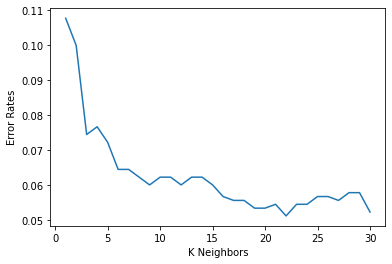

In [27]:
plt.plot(range(1, k_max), test_error_rates)
plt.ylabel('Error Rates')
plt.xlabel('K Neighbors')

plt.show()

#### Grid Cross Validation with Pipeline

In [28]:
scaler = StandardScaler()

In [29]:
knn = KNeighborsClassifier()

In [30]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [31]:
# we want the pipeline to SCALE the data and TRAIN the model
operations = [('scaler', scaler), ('knn', knn)]

In [32]:
from sklearn.pipeline import Pipeline

In [33]:
pipe = Pipeline(operations)

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
k_values = list(range(1,21))
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [36]:
param_grid = {'knn__n_neighbors': k_values}

In [37]:
# help(knn)

In [38]:
# SET UP GRID SEARCH
full_cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [39]:
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20]},
             scoring='accuracy')

In [40]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=20))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=20),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 20,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [41]:
full_pred = full_cv_classifier.predict(X_test)

In [42]:
print(classification_report(y_test, full_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900



In [43]:
new_data = [[3.8, 6.4]]

In [44]:
full_cv_classifier.predict(new_data)

array([0], dtype=int64)

In [45]:
full_cv_classifier.predict_proba(new_data)

array([[0.7, 0.3]])